In [10]:
import numpy as np
from implementations_leo import *
from proj1_helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
y, x, ids = load_csv_data("train.csv", sub_sample=False)
_, x_submission, ids_submission = load_csv_data("test.csv", sub_sample=False)

In [4]:
x[x==-999] = 0
x_submission[x_submission == -999] = 0

C:\Users\leope\Google Drive\EPFL\ML\ml-exercises-project1\implementations_leo.py:45: RuntimeWarning: overflow encountered in exp
  phi[:,x.shape[1] *degree-3 + col] = np.exp(x[:,col])
C:\Users\leope\Google Drive\EPFL\ML\ml-exercises-project1\implementations_leo.py:46: RuntimeWarning: divide by zero encountered in log
  phi[:,x.shape[1] *degree-2 + col] = np.log(x[:,col])
C:\Users\leope\Google Drive\EPFL\ML\ml-exercises-project1\implementations_leo.py:44: RuntimeWarning: invalid value encountered in sqrt
  phi[:,x.shape[1] *degree-4 + col] = np.sqrt(x[:,col])
C:\Users\leope\Google Drive\EPFL\ML\ml-exercises-project1\implementations_leo.py:46: RuntimeWarning: invalid value encountered in log
  phi[:,x.shape[1] *degree-2 + col] = np.log(x[:,col])


Correct answers:  0.0 %


C:\Users\leope\Google Drive\EPFL\ML\ml-exercises-project1\implementations_leo.py:170: RuntimeWarning: invalid value encountered in sign
  correct = sum(np.sign(y_pred) == y)/len(y)


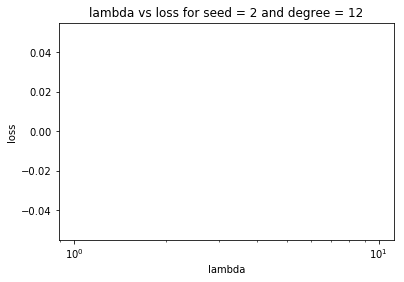

In [9]:
ratio = .9
seed = 2
N = 10
loss = []
#lambdas = np.logspace(-7,12,50)
lambdas = [.7e-5]
degree = 12

y_train, x_train, y_test, x_test = split_data(y, x, ratio, seed)

phi_test = build_poly(x_test, degree, False)
phi_train = build_poly(x_train, degree, False)

for l in lambdas:
    
    w = ridge_regression(y_train, phi_train, l)
    rmse_test = cost_function(y_test, phi_test, w)

    loss.append(rmse_test)

    print("Correct answers: ",predict(y_test,phi_test,w), '%')
plt.title("lambda vs loss for seed = %i and degree = %i" %(seed, degree))
plt.xlabel("lambda")
plt.ylabel("loss")
plt.semilogx(lambdas, loss)

In [95]:
np.mod(1.5,1)

0.5

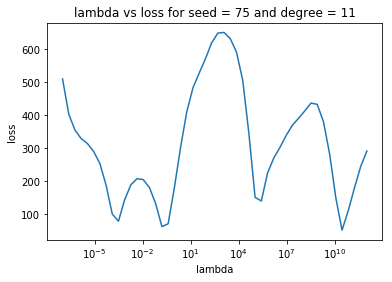

In [29]:
plt.title("lambda vs loss for seed = %i and degree = %i" %(seed, degree))
plt.xlabel("lambda")
plt.ylabel("loss")
plt.semilogx(lambdas, loss)
plt.savefig("seed75_degree11.png")

In [10]:
ratio = .65
seed = 4
N = 10
loss = []
lambdas = np.logspace(0.7,1.2,5)
degree = 11


y_train, x_train, y_test, x_test = split_data(y, x, ratio, seed)
phi_test = build_poly(x_test, degree, False)
phi_train = build_poly(x_train, degree, False)

for l in lambdas:
    
    w = ridge_regression(y_train, phi_train, l)
    rmse_test = cost_function(y_test, phi_test, w)

    loss.append(rmse_test)

    print("Correct answers: ",predict(y_test,phi_test,w), '%')
plt.semilogx(lambdas, loss)

LinAlgError: Singular matrix

Correct answers:  78.104 %
Correct answers:  80.2736 %
Correct answers:  81.2304 %
Correct answers:  81.5296 %
Correct answers:  81.7152 %
Correct answers:  81.768 %
Correct answers:  81.784 %
Correct answers:  81.8016 %
Correct answers:  81.7968 %
Correct answers:  81.7424 %
Correct answers:  79.104 %
Correct answers:  69.0352 %
Correct answers:  71.9376 %
Correct answers:  81.2864 %
Correct answers:  82.0784 %
Correct answers:  82.1152 %
Correct answers:  82.16 %
Correct answers:  82.1344 %
Correct answers:  82.0896 %
Correct answers:  82.048 %
Correct answers:  79.336 %
Correct answers:  78.2384 %
Correct answers:  77.2672 %
Correct answers:  77.9616 %
Correct answers:  64.2352 %
Correct answers:  74.8944 %
Correct answers:  80.688 %
Correct answers:  81.776 %
Correct answers:  81.8032 %
Correct answers:  81.7312 %
Correct answers:  69.2304 %
Correct answers:  80.2352 %
Correct answers:  82.0192 %
Correct answers:  65.7552 %
Correct answers:  80.808 %
Correct answers:  82.104 %
Corr

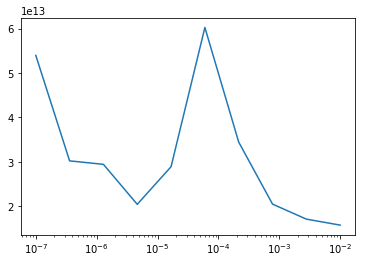

In [8]:
N = 10
seed = 2
loss = np.zeros((N))
lambdas = np.logspace(-7,-2,N)
#lambdas = [6.5e-2]
degree = 12
k_fold = 4
phi = build_poly(x, degree, False)
k_indices = build_k_indices(y, k_fold, seed+8)

for k in range(4):
    
    y_train, phi_train, y_test, phi_test = split_data_cross(y, phi, k, k_indices, degree)

    loss_temp = []
    for l in lambdas:
        w = ridge_regression(y_train, phi_train, l)
        rmse_test = cost_function(y_test, phi_test, w)

        loss_temp.append(rmse_test)

        print("Correct answers: ",predict(y_test,phi_test,w), '%')
    loss += loss_temp
plt.semilogx(lambdas, loss)

In [ ]:
ratio = .65
seed = 22
degree = 11
#y_train, x_train, y_test, x_test = split_data(y, x, ratio, seed)
k_fold = 4
k_indices = build_k_indices(y, k_fold, seed)


#phi_train = build_poly(x_train, degree)
#phi_test = build_poly(x_test, degree)

lambdas = np.linspace(2.1,3.9,N)
#loss = []
rmse_tr = []
rmse_te = []

for i, l in enumerate(lambdas):
    print("lambda = ", l)
    loss_tr = 0
    loss_te = 0
    for k in range(k_fold):
        print("k = ", k)
        a,b =cross_validation(y, x, k_indices, k, l, degree)
        loss_tr += a
        loss_te += b

    rmse_tr.append(loss_tr/k_fold)
    rmse_te.append(loss_te/k_fold)
    
    #w = ridge_regression(y_train, phi_train, l)
    
    #rmse_train = cost_function(y_train, phi_train, w)
    #rmse_test = cost_function(y_test, phi_test, w)
    
    #loss.append(rmse_test)
    
    #print("Correct answers: ",predict(y_test,phi_test,w), '%')
    
cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
#plt.plot(lambdas, loss)

In [16]:
phi_submission = build_poly(x_submission, degree, False) 

y_predicted = np.sign(phi_submission.dot(w))
create_csv_submission(ids_submission, y_predicted, "predictions_6.csv")

In [17]:
phi_submission.dot(w)
print(sum(y_predicted==-1)/len(y_predicted), sum(y==-1)/len(y))

0.685952013065 0.657332


In [74]:
yp = phi_test.dot(w)
yp = np.sign(yp)
sum(yp == y_test)/len(y_test)
print(sum(sum(phi_submission == 0)))
x_submission

44881353


array([[   0.   ,   79.589,   23.916, ...,    0.   ,    0.   ,    0.   ],
       [ 106.398,   67.49 ,   87.949, ...,    0.   ,    0.   ,   47.575],
       [ 117.794,   56.226,   96.358, ...,    0.   ,    0.   ,    0.   ],
       ..., 
       [ 108.497,    9.837,   65.149, ...,    0.   ,    0.   ,    0.   ],
       [  96.711,   20.006,   66.942, ...,    0.   ,    0.   ,   30.863],
       [  92.373,   80.109,   77.619, ...,    0.   ,    0.   ,    0.   ]])